In [5]:
import random
import networkx as nx
# random module have the random function which return random number from [0,1[
rand_numbers = []
for i in range(10):
    rand_numbers.append(random.random())

In [2]:
rand_numbers

[0.5368114144073928,
 0.5786420727269872,
 0.8592702071699919,
 0.5939259914642596,
 0.5025195882426511,
 0.9576104942744244,
 0.08720786942866177,
 0.522378643119933,
 0.6191807996762639,
 0.8024147397724619]

In [3]:
# random.choice chooses a random value from a list of values
print(random.choice(['apple', 'tomato', 'orange']))

apple


In [5]:
print(random.choice(['apple', 'tomato', 'orange']))

tomato


In [7]:
import networkx as nx
G = nx.cycle_graph(5)
random.sample(G.nodes, 2) # this chooses 2 random nodes from the graph

/tmp/ipykernel_16861/2232682387.py:3: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  random.sample(G.nodes, 2) # this chooses 2 random nodes from the graph


[0, 4]

In [8]:
names = ['Alice', 'Bob', 'Carol']
tickets = [1, 3, 4]

for _ in range(5):
    print(random.choices(names, tickets))

['Carol']
['Bob']
['Carol']
['Bob']
['Bob']


In [2]:
import itertools
elements = [0, 1, 2, 3, 4]
list(itertools.combinations(elements, 2))

[(0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 2),
 (1, 3),
 (1, 4),
 (2, 3),
 (2, 4),
 (3, 4)]

In [3]:
def gnp_random_graph(N, p):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    for i, j in itertools.combinations(G.nodes, 2):
        r = random.random()
        if r < p:
            G.add_edge(i, j)
        # Do nothing if r >= p
        
    return G

Graph has 21 edges.


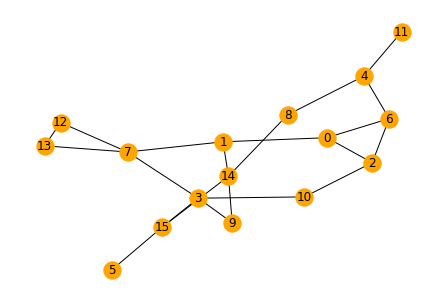

In [6]:
G = gnp_random_graph(16, 0.15)
nx.draw(G, with_labels=True, node_color="orange")
print('Graph has', G.number_of_edges(), 'edges.')

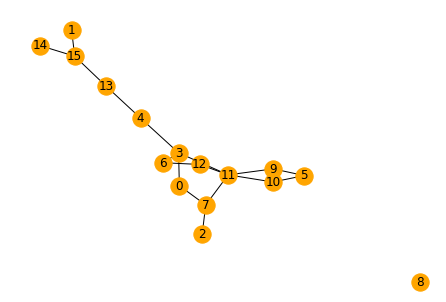

In [7]:
def gnm_random_graph(N, M):
    G = nx.Graph()
    G.add_nodes_from(range(N))
    
    possible_edges = itertools.combinations(G.nodes, 2)
    edges_to_add = random.sample(list(possible_edges), M)
    G.add_edges_from(edges_to_add)
    
    return G


G = gnm_random_graph(16, 18)
nx.draw(G,  with_labels=True, node_color="orange")

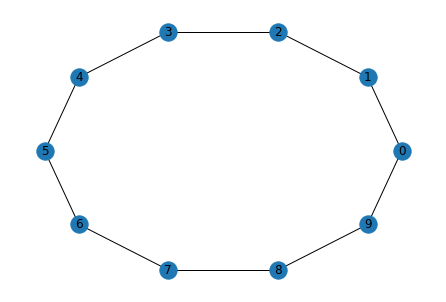

In [8]:
N = 10
G = nx.cycle_graph(N)
nx.draw_circular(G, with_labels=True)

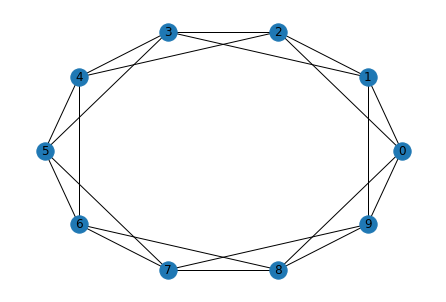

In [9]:
k = 4

for n in G.nodes:
    for i in range(1, k // 2 + 1):
        left  = (n-i) % N
        right = (n+i) % N 
        G.add_edge(n, left)
        G.add_edge(n, right)

nx.draw_circular(G, with_labels=True)

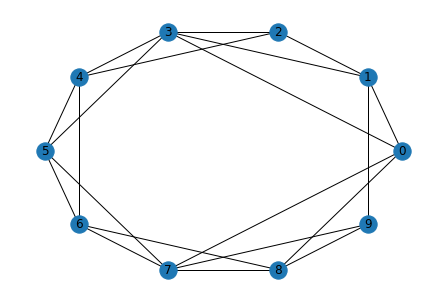

In [10]:
p = 0.1
for u, v in list(G.edges):
    if random.random() < p:
        not_neighbors = set(G.nodes) - set(G.neighbors(u))
        w = random.choice(list(not_neighbors))
        G.remove_edge(u, v)
        G.add_edge(u, w)

nx.draw_circular(G, with_labels=True)

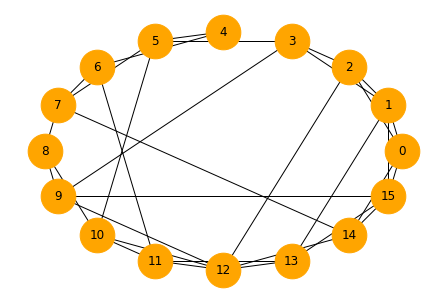

In [11]:
def watts_strogatz_graph(N, k, p):
    # 1. Create a ring of N nodes
    G = nx.cycle_graph(N)

    # 2. Connect each node n to k nearest neighbors
    #    [n-(k//2), ... , n-1, n+1, ... , n+(k//2)]
    for n in G.nodes:
        for i in range(1, k // 2 + 1):
            left  = (n-i) % N
            right = (n+i) % N 
            G.add_edge(n, left)
            G.add_edge(n, right)
    
    # 3. Rewire edges with probability p
    for u, v in list(G.edges):
        if random.random() < p:
            not_neighbors = set(G.nodes) - set(G.neighbors(u)) - {u}
            w = random.choice(list(not_neighbors))
            G.remove_edge(u, v)
            G.add_edge(u, w)

    return G


G = watts_strogatz_graph(16, 4, 0.2)
nx.draw_circular(G, with_labels=True, node_color='orange', node_size=1200)

[4, 1, 1, 1, 1]


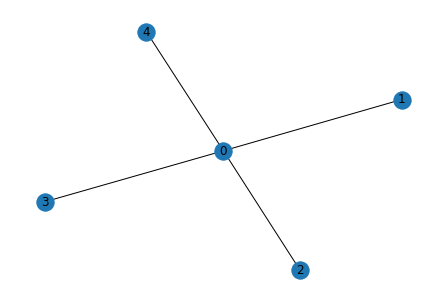

In [12]:
G = nx.star_graph(4)
degrees = [G.degree(n) for n in G.nodes]

print(degrees)
nx.draw(G, with_labels=True)

In [13]:
def barabasi_albert_graph(N, m):
    G = nx.complete_graph(m + 1)
    for i in range(G.number_of_nodes(), N):
        new_neighbors = []
        possible_neighbors = list(G.nodes)
        for _ in range(m):
            degrees = [G.degree(n) for n in possible_neighbors]
            j = random.choices(possible_neighbors, degrees)[0]
            new_neighbors.append(j)
            possible_neighbors.remove(j)
        
        for j in new_neighbors:
            G.add_edge(i, j)

    return G

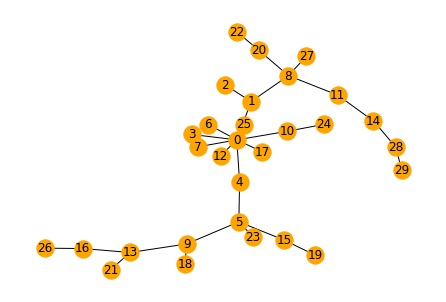

In [14]:
G = barabasi_albert_graph(30, 1)
nx.draw(G, with_labels=True, node_color='orange')